# Importing Libraries, Reading in and Viewing Our Data

Importing all the necessary libraries

In [48]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

Reading in the dataset and taking a look

In [49]:
df = pd.read_csv('Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


Removing the Booking_ID column because it is useless for our analysis

In [50]:
df.drop('Booking_ID', inplace=True, axis=1)

Taking a look at our data at a high level

In [51]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [52]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [54]:
(df['arrival_month'].astype(str) +'-'+ df['arrival_year'].astype(str)).value_counts()

10-2018    3404
6-2018     3203
9-2018     2962
8-2018     2799
4-2018     2736
5-2018     2598
7-2018     2557
3-2018     2358
11-2018    2333
12-2018    2093
10-2017    1913
2-2018     1704
9-2017     1649
8-2017     1014
1-2018     1014
12-2017     928
11-2017     647
7-2017      363
dtype: int64

In [55]:
df.nunique()

no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       8
no_of_week_nights                         18
type_of_meal_plan                          4
required_car_parking_space                 2
room_type_reserved                         7
lead_time                                352
arrival_year                               2
arrival_month                             12
arrival_date                              31
market_segment_type                        5
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      59
avg_price_per_room                      3930
no_of_special_requests                     6
booking_status                             2
dtype: int64

# Data Exploration

Number of data points

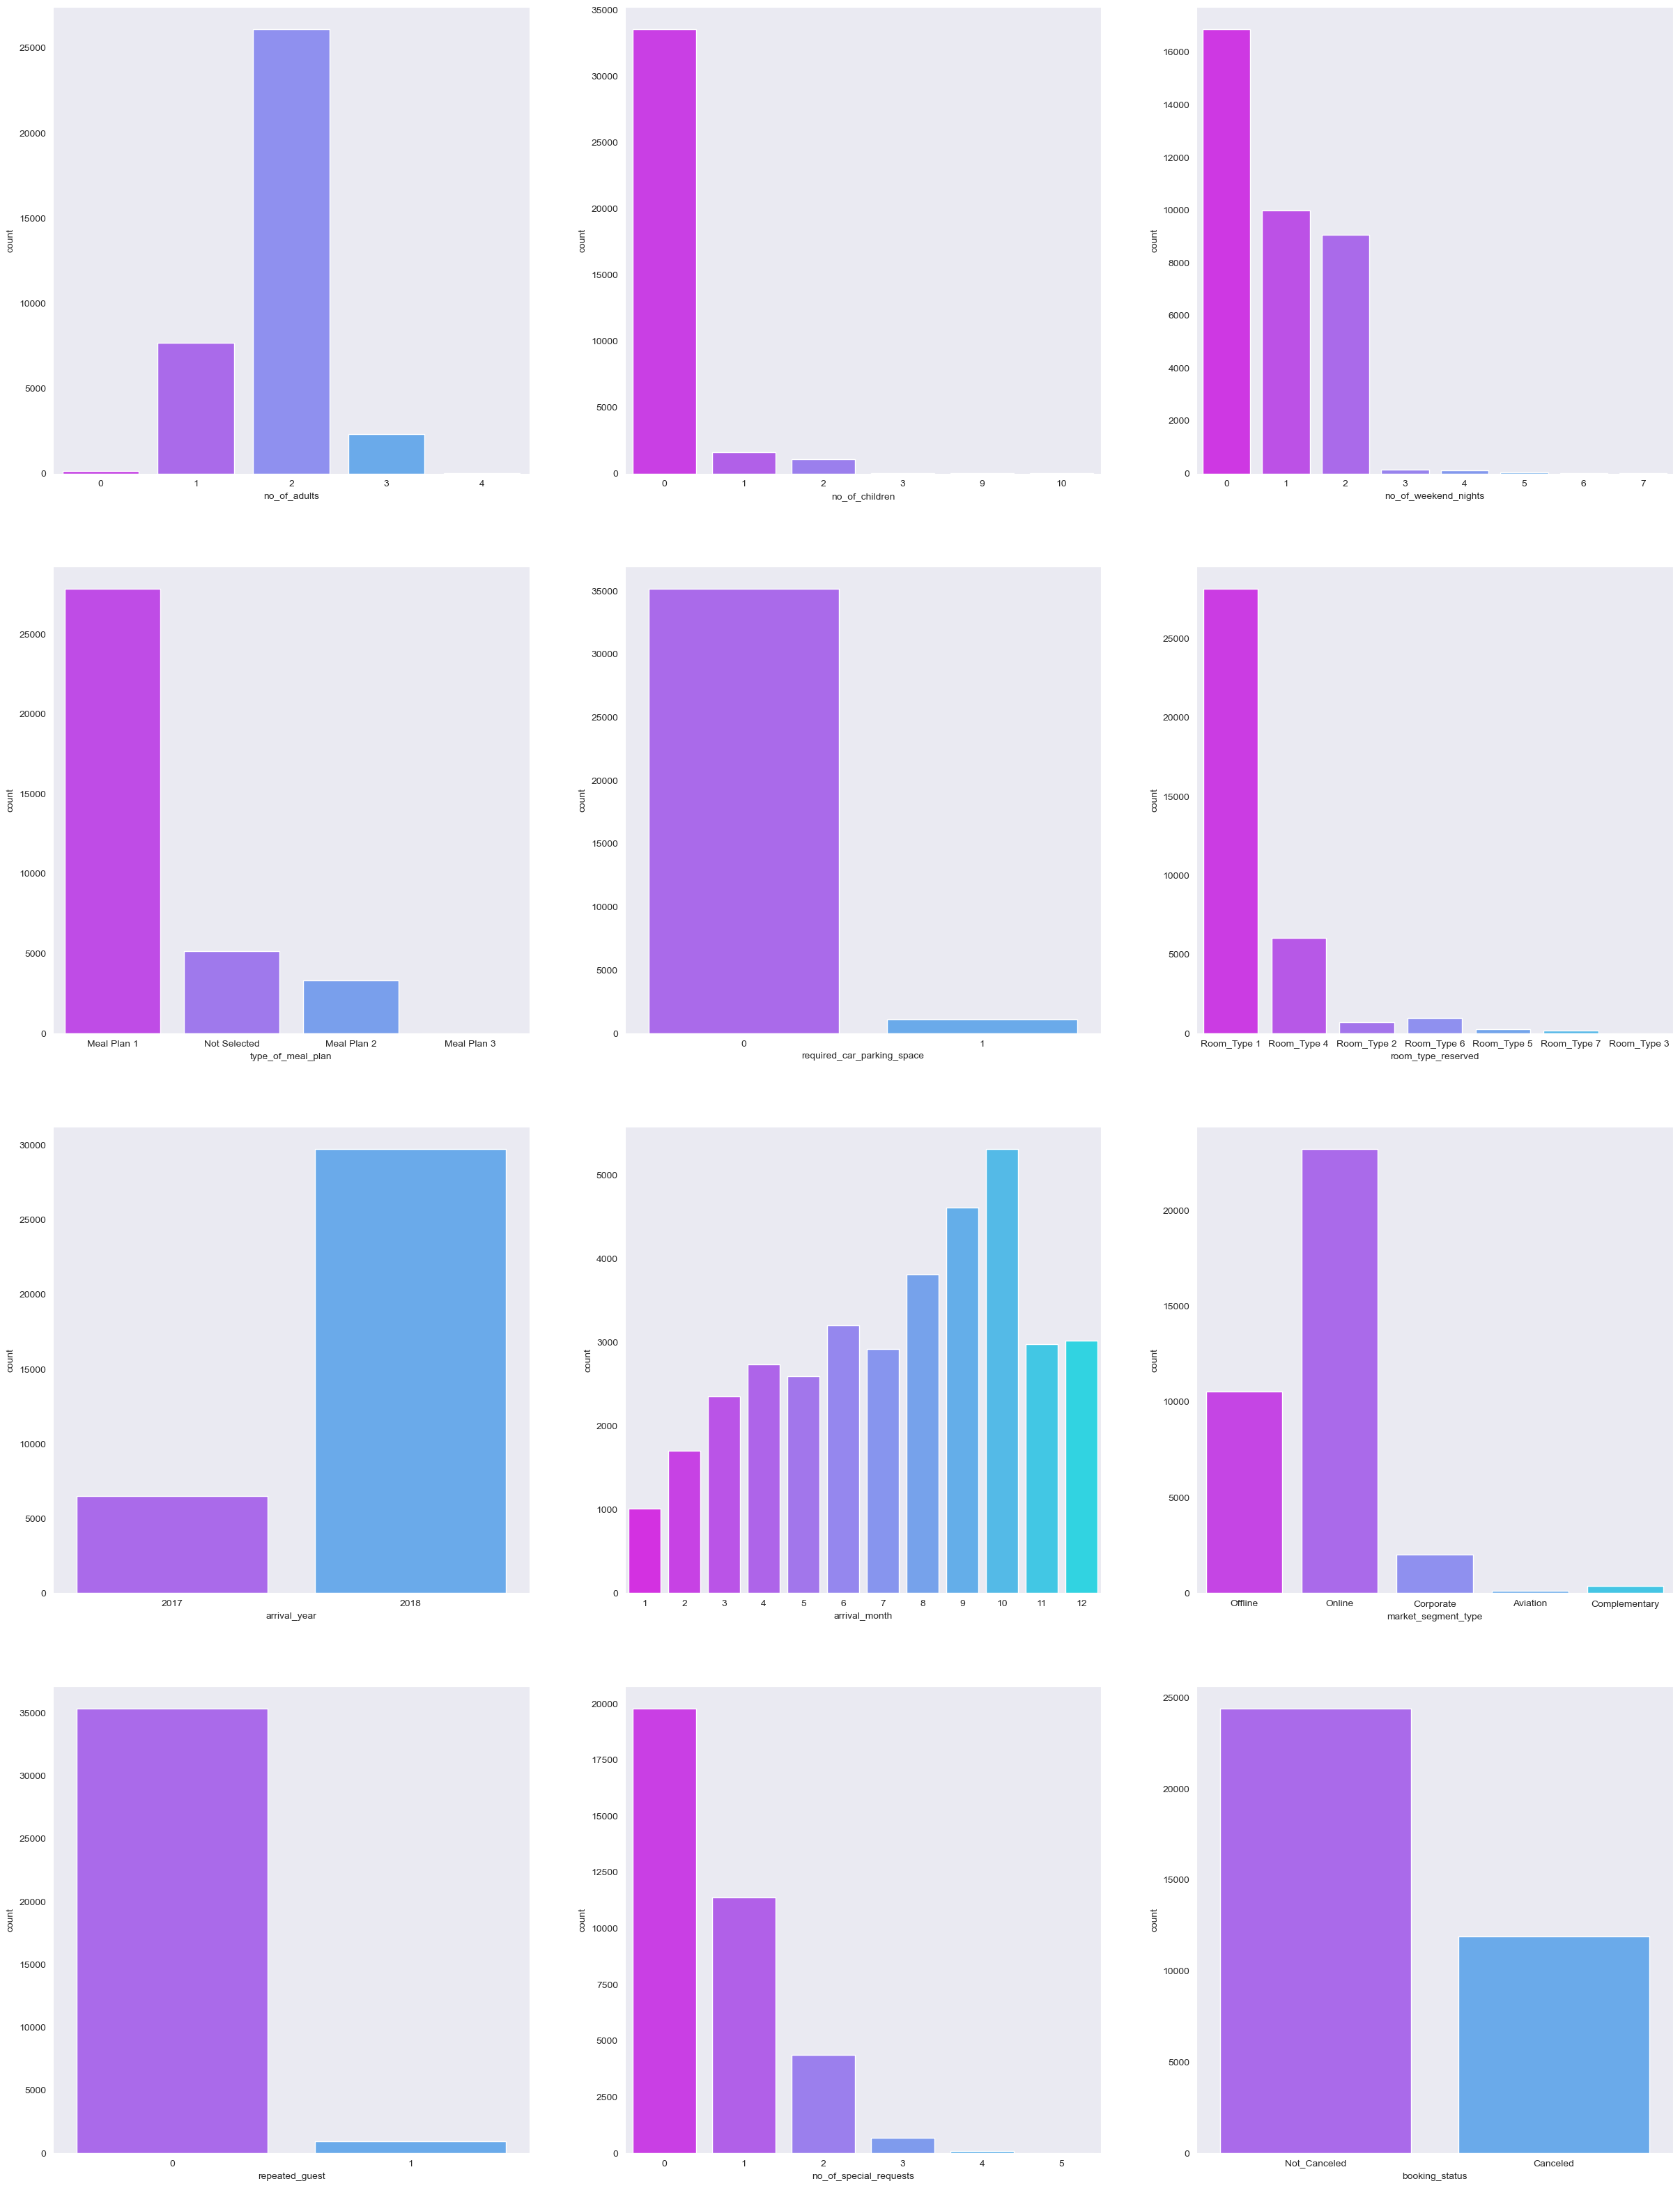

In [56]:
sns.set_style('dark')

row = 0
col = 0

fig, ax = plt.subplots(4, 3, figsize=(30,40))

for column in df.drop(['lead_time', 'avg_price_per_room', 'no_of_previous_cancellations',
                       'no_of_previous_bookings_not_canceled', 'arrival_date', 'no_of_week_nights'], axis=1).columns:
    sns.countplot(data=df, x=column, palette='cool_r', ax=ax[row, col])
    col += 1
    if col > 2:
        row += 1
        col = 0

Frequency distribution of values

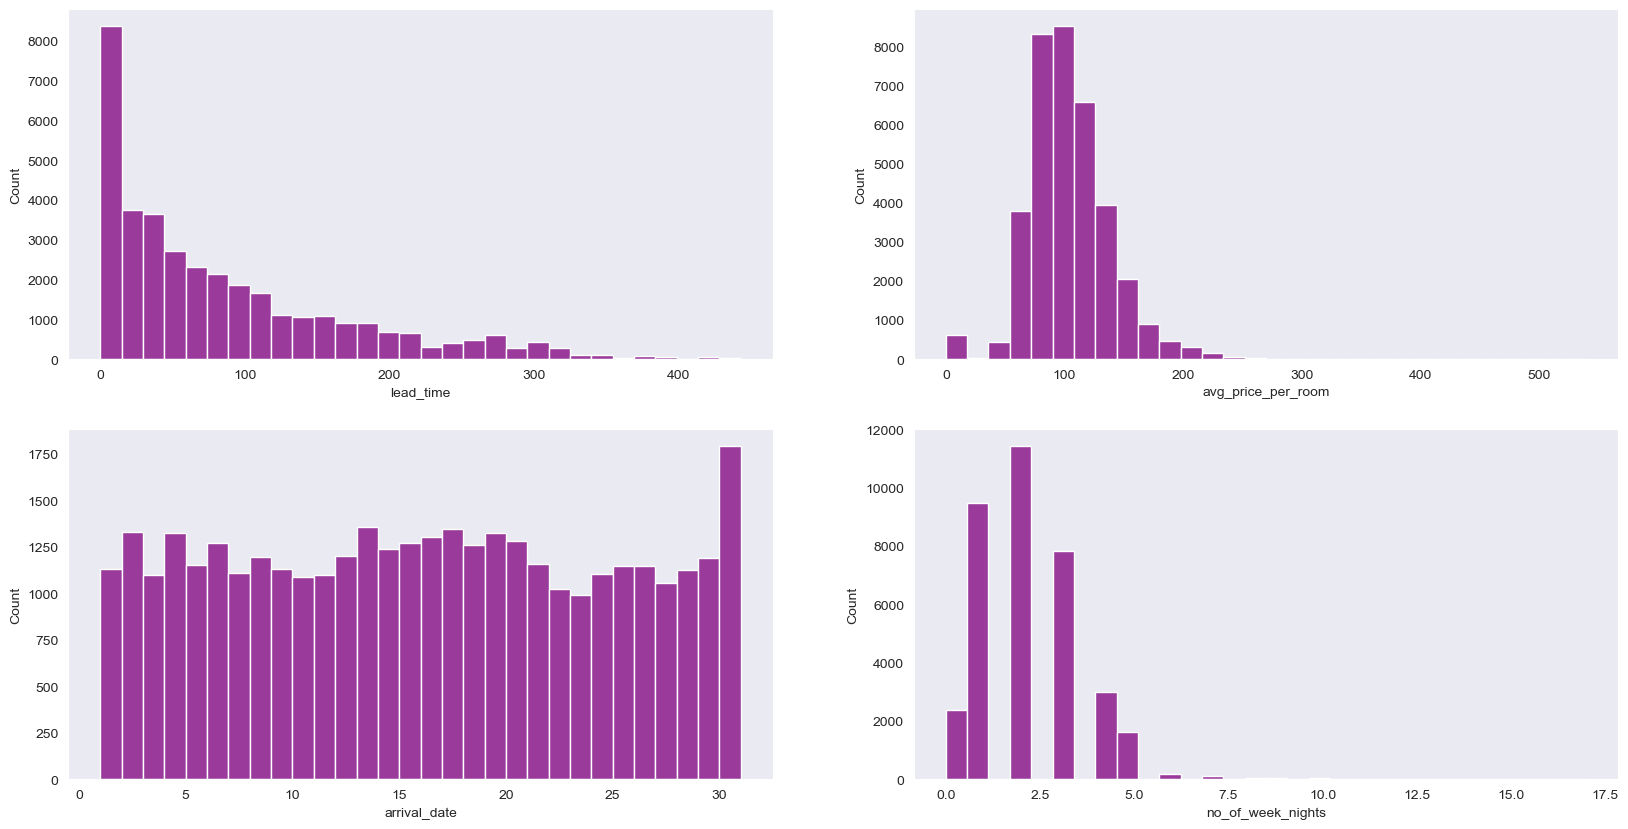

In [57]:
row = 0
col = 0

fig, ax = plt.subplots(2, 2, figsize=(20,10))

for column in ['lead_time', 'avg_price_per_room', 'arrival_date', 'no_of_week_nights']:
    sns.histplot(data=df, x=column, color='purple', ax=ax[row, col], bins=30)
    col += 1
    if col > 1:
        row += 1
        col = 0

Relationship between lead time/price over the months

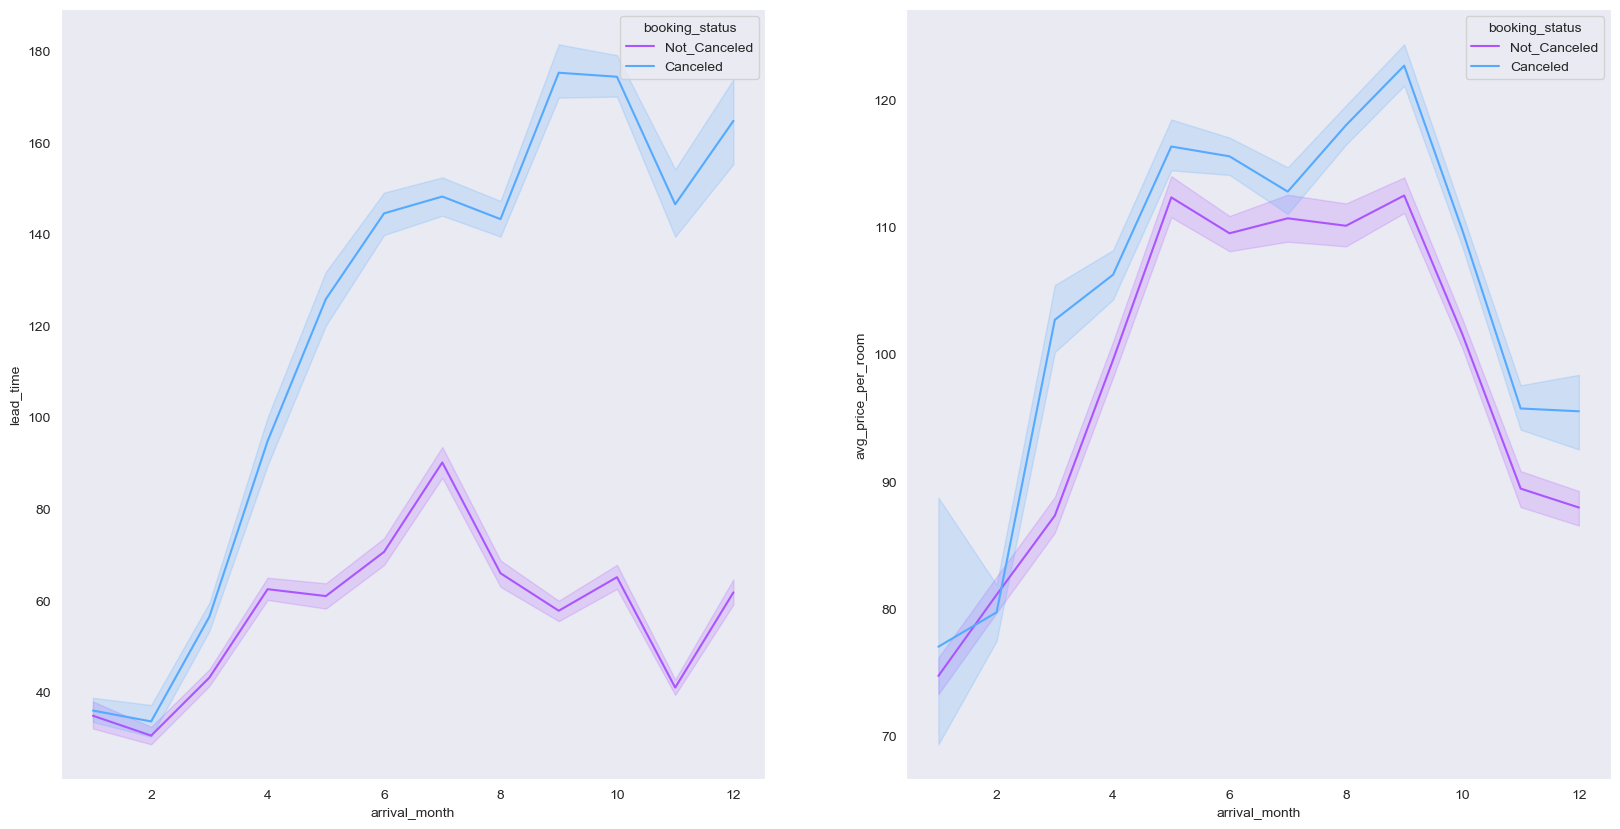

In [58]:
row = 0
col = 0

fig, ax = plt.subplots(1, 2, figsize=(20,10))

for column in ['lead_time', 'avg_price_per_room']:
    sns.lineplot(data=df, x='arrival_month', y=column, hue='booking_status', palette='cool_r', ax=ax[col])    
    col += 1

Distribution of lead time/price with various columns

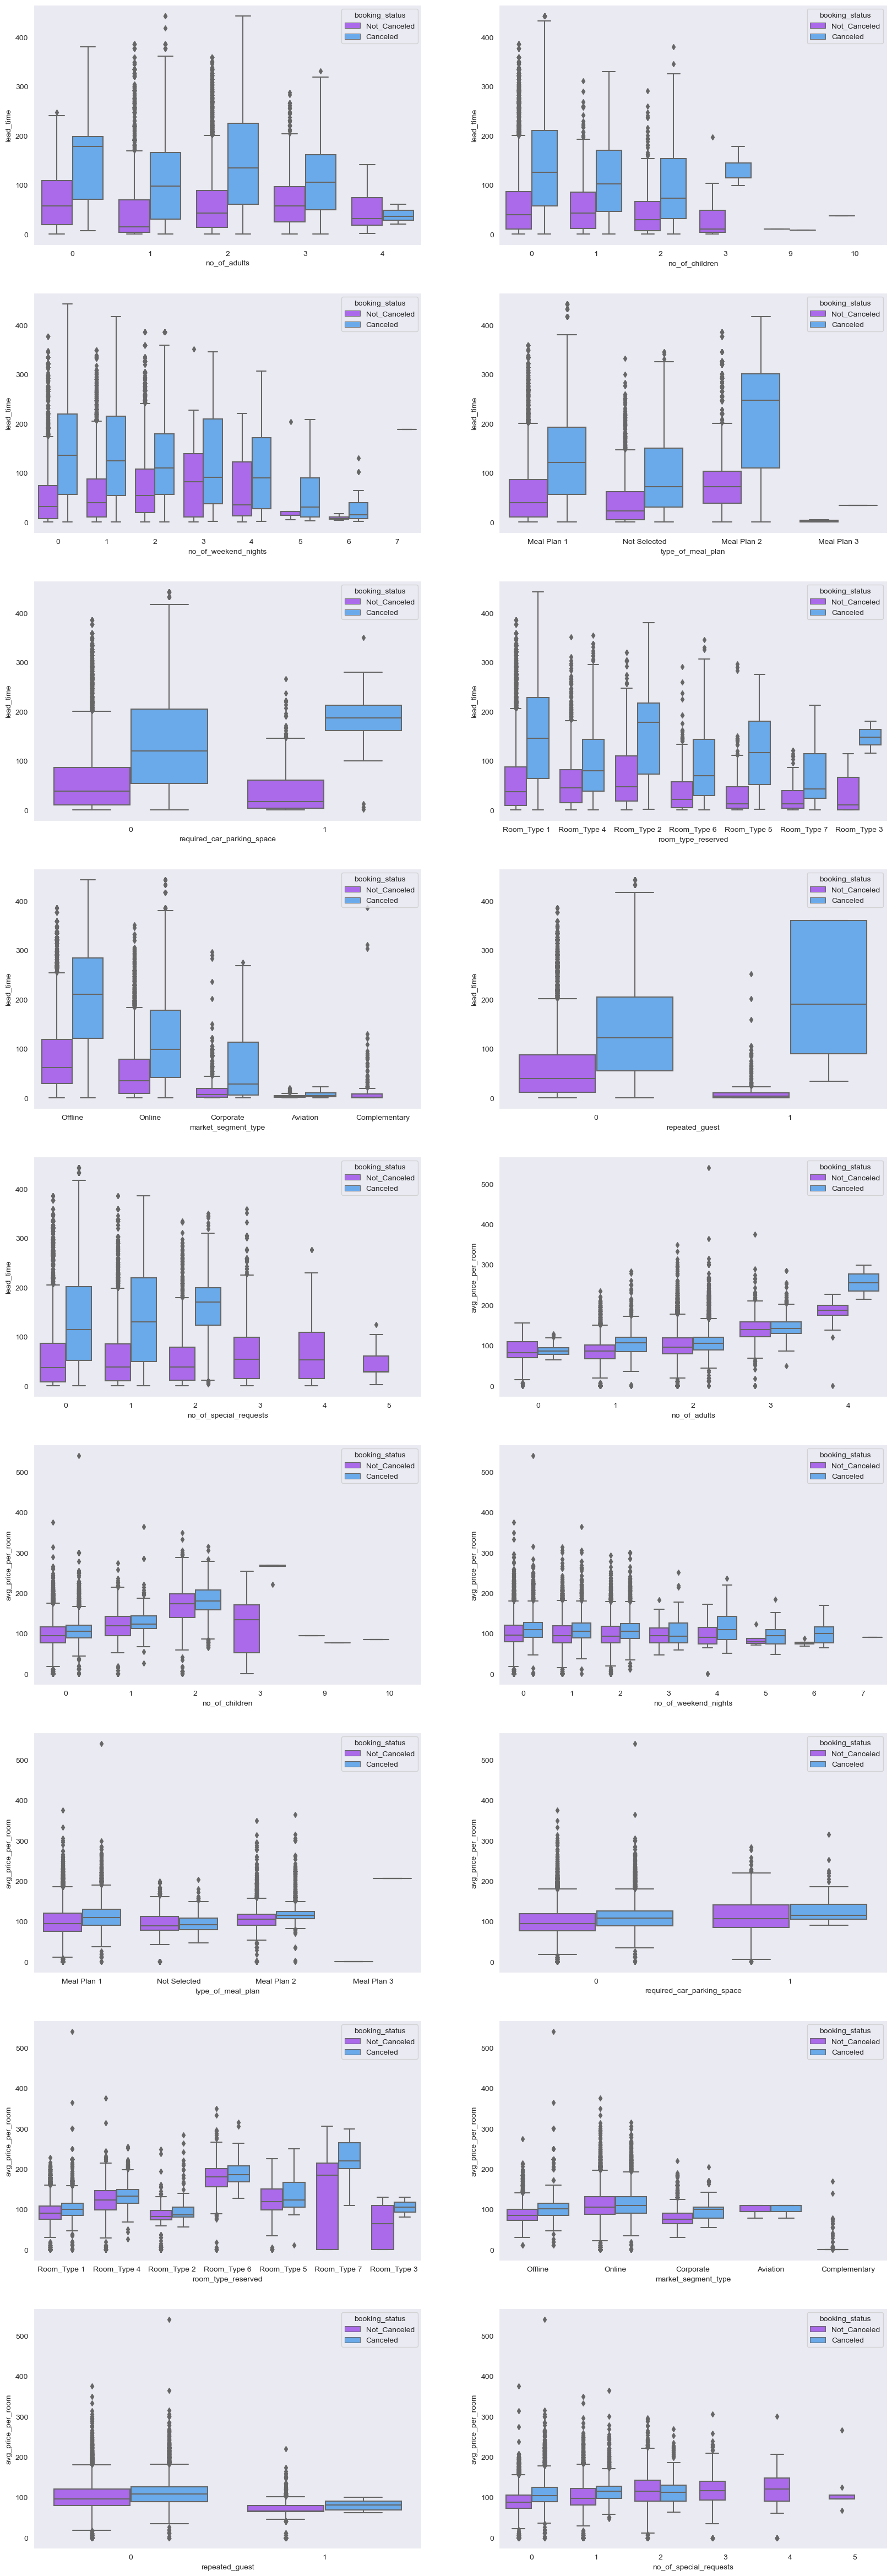

In [59]:
row = 0
col = 0

fig, ax = plt.subplots(9, 2, figsize=(20,60))

for item in ['lead_time', 'avg_price_per_room']:
    for column in ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'type_of_meal_plan', 'required_car_parking_space',
                  'room_type_reserved', 'market_segment_type', 'repeated_guest', 'no_of_special_requests']:
        sns.boxplot(data=df, x=column, y=item, palette='cool_r', ax=ax[row, col], hue='booking_status')
        col += 1
        if col > 1:
            row += 1
            col = 0

Relationship between lead time and price

<AxesSubplot:xlabel='lead_time', ylabel='avg_price_per_room'>

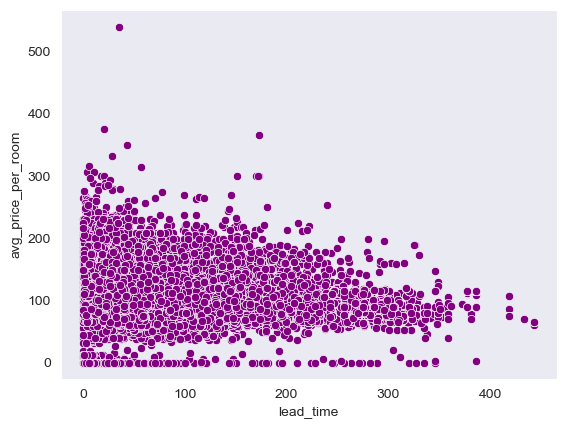

In [60]:
sns.scatterplot(data=df, x='lead_time', y='avg_price_per_room', color='purple')

Number of observations per month

<AxesSubplot:xlabel='arrival_month', ylabel='count'>

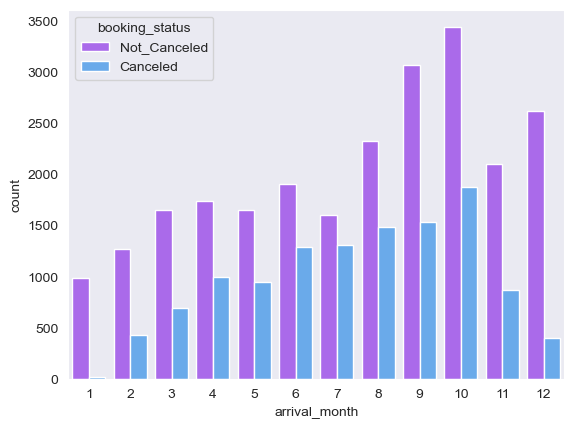

In [61]:
sns.countplot(data=df, x='arrival_month', hue='booking_status', palette='cool_r')

Finding what months have the highest cancellation percentage

In [62]:
count_table = df.groupby(['arrival_month', 'booking_status']).count()
canceled_by_month = pd.pivot_table(count_table, values='no_of_adults', index='arrival_month', columns='booking_status')
canceled_by_month['percent_canceled'] = 100*canceled_by_month['Canceled'] / (canceled_by_month['Not_Canceled'] 
                                                                             + canceled_by_month['Canceled'])
canceled_by_month.sort_values(by='percent_canceled', ascending=False)

booking_status,Canceled,Not_Canceled,percent_canceled
arrival_month,,,
7,1314,1606,45.000000
6,1291,1912,40.305963
8,1488,2325,39.024390
5,948,1650,36.489607
4,995,1741,36.366959
10,1880,3437,35.358285
9,1538,3073,33.355021
3,700,1658,29.686175
11,875,2105,29.362416


Checking the correlation amongst our features

<AxesSubplot:>

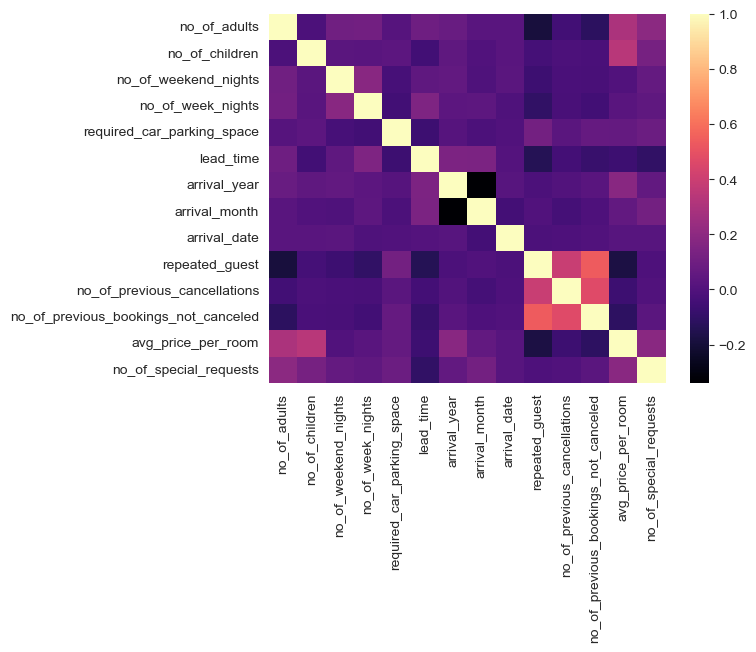

In [63]:
sns.heatmap(df.corr(), cmap='magma')

# Machine Learning

Checking how many columns we need to change from the object type

In [64]:
df.dtypes.value_counts()

int64      13
object      4
float64     1
dtype: int64

Encoding our booking status column

In [65]:
df.booking_status = pd.Categorical(df.booking_status)
df_categorical = df.copy()
df_categorical['booking_status'] = df.booking_status.cat.codes
df_categorical.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,0


Creating dummy variables for our other object columns

In [66]:
df_dummies = pd.get_dummies(df_categorical.drop('booking_status', axis=1))
df_dummies['booking_status'] = df_categorical['booking_status']
df_dummies.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,1,0,1
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,1,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,1,0
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,1,0
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,1,0


Splitting our data into target and features

In [67]:
X = df_dummies.drop('booking_status', axis=1)
y = df_dummies['booking_status']

Choosing the 10 best predictor features to use

In [68]:
select = SelectKBest(f_classif, k=10)
X_best = select.fit_transform(X, y)

In [69]:
columns = X.columns[select.fit(X, y).get_support(indices=True)].tolist()
best_features = pd.DataFrame(X_best, columns=columns)

Creating training and testing groups of our data

In [70]:
X_train, X_test, y_train, y_test = train_test_split(best_features, y, test_size = .25)

Oversampling since we have many more non-cancellations compared to cancellations

In [71]:
oversample = RandomOverSampler()
X_train, y_train = oversample.fit_resample(X_train, y_train)

Normalizing our data

In [72]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Setting up for GridSearchCV to find our most effective parameters by creating lists of our model names, models, and the different combinations of parameters we want to try

In [73]:
model_names = ['K Nearest Neighbors', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC']
base_models = [KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC()]
parameters = [
    {'n_neighbors': [3, 4, 5, 6, 7, 8],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]},
    {'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'C': [1, 2, 3]},
    {'max_depth': [None, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy', 'log_loss']},
    {'max_depth': [None, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy', 'log_loss']},
    {'C': [1.0, 2.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']}
]

Looping through the lists we made above by using GridSearchCV to find our best performers

In [74]:
models = []

for i in range(5):
    model = GridSearchCV(base_models[i], parameters[i], n_jobs=-1, scoring='accuracy', cv=5)
    models.append(model)

Looping through each model, gathering score metrics in a dictionary, and printing out our confusion matrixes and classification reports

In [44]:
warnings.filterwarnings("ignore")
scores = {}
i = 0

for model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores[f'{model_names[i]}'] = accuracy_score(y_test, pred), precision_score(y_test, pred), f1_score(y_test, pred), recall_score(y_test, pred)
    print(f'{model_names[i]}')
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    print('\n')
    i += 1

K Nearest Neighbors
[[2413  525]
 [ 795 5336]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.79      2938
           1       0.91      0.87      0.89      6131

    accuracy                           0.85      9069
   macro avg       0.83      0.85      0.84      9069
weighted avg       0.86      0.85      0.86      9069



Logistic Regression
[[2204  734]
 [1360 4771]]
              precision    recall  f1-score   support

           0       0.62      0.75      0.68      2938
           1       0.87      0.78      0.82      6131

    accuracy                           0.77      9069
   macro avg       0.74      0.76      0.75      9069
weighted avg       0.79      0.77      0.77      9069



Decision Tree
[[2270  668]
 [ 707 5424]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      2938
           1       0.89      0.88      0.89      6131

    accuracy                           0.85

Creating a dataframe to easily visualize the performance of our models, ordering it by highest accuracy score

In [75]:
scores_cols = ['Accuracy', 'Precision', 'F1', 'Recall']

scores_df = pd.DataFrame.from_dict(scores, orient='index', columns=scores_cols).sort_values('Accuracy', ascending=False)
scores_df.head()

,Accuracy,Precision,F1,Recall
Random Forest,0.872202,0.905679,0.905457,0.905236
K Nearest Neighbors,0.854449,0.910425,0.889927,0.870331
Decision Tree,0.848385,0.890348,0.887507,0.884684
SVC,0.808909,0.891420,0.852498,0.816832
Logistic Regression,0.769104,0.866667,0.820041,0.778176


RandomForestClassifier is the winner! It had the highest score in almost every category, with all scores over 90% except Accuracy (87%)